### Άσκηση 2 του φυλλάδιου ασκήσεων 15/03/2018 

Το φύλλο εργασίας Jupyter/SageMath για την 

- Εύρεση των ροών των διανυσματικών πεδίων 
$$X(x,y) =  x\,\partial_x + y\,\partial_y\,, \qquad 
  Y(x,y) = -y\,\partial_x + x\,\partial_z\,,$$ 
και της παραγώγου Lie $\mathcal{L}_X Y$.
<br><br>
- Γραφική απεικόνιση της καμπύλης 
$$c(t) = \big( \tau_{-t} \circ \sigma_{-t}\circ \tau_t\circ
    \sigma_t\big)(1,0)\,,\quad t\in \big(0,\frac{\pi}{4}\big)\,. $$ <br>
που παράγεται από τις ροές $\sigma_t$ και $\tau_s$ των διανυσματικών πεδίων $X$ και $Y$, αντίστοιχα. 

In [1]:
%display latex

---
Πρώτα απ' όλα ορίζουμε στο Sage την πολλαπλότητα $M=\mathbb{R}^2$, κι ένα χάρτη της $(U,\phi)$ με συντεταγμένες $(x,y)$

In [2]:
M = Manifold(2, 'R^2', '\RR^2', start_index=1)
U.<x,y> = M.chart()

In [3]:
print M ; 
print U ;

2-dimensional differentiable manifold R^2
Chart (R^2, (x, y))


Στην συνέχεια ορίζουμε τα διανυσματικά πεδία $X$ και $Y$

In [4]:
X = M.vector_field('X')
X[ : ] = ( x , y )
X.display()

X = x d/dx + y d/dy

In [5]:
Y = M.vector_field('Y')
Y[ : ] = ( -y , x )
Y.display()

Y = -y d/dx + x d/dy

Η παράγωγος Lie στο Sage δίνεται από την εντολή (μέθοδο) <code> .lie_der() </code>

---

Η παράγωγος Lie $\mathcal{L}_X Y$ είναι

In [6]:
LxY = Y.lie_der(X) ; LxY.display()

0

δηλαδή  $\mathcal{L}_X Y = [\,X\, ,\, Y\,] = 0$.

---

### Υπολογισμός ροών
Για τον υπολογισμό των ροών $\sigma_t$ και $\tau_s$ των διανυσματικών πεδίων $X$ και $Y$, αντίστοιχα, πρέπει να λύσουμε (ξεχωριστά) τα παρακάτω προβλήματα αρχικών τιμών (πατ) <br><br>
\begin{align*}
\dot x(t) &= x(t) \qquad \qquad & \dot x(s) &= -y(s) \\ 
\dot y(t) &= y(t)  \qquad \qquad & \dot y(s) &= x(s) \\
\end{align*}<br>
με αρχικές τιμές $x(0)=x_0$, $y(0)=y_0$. Στα παρακάτω λύνουμε συμβολικά τα πατ με το Sage!

In [7]:
var('t , x0 , y0');
x1 = function('x1')(t);
y1 = function('y1')(t);
XX = vector( [ x1 , y1 ] )
A = matrix([[1,0],[0,1]])
systemX = [diff(XX[i], t) - (A*XX)[i] for i in range(2)]
sol1 = desolve_system(systemX, [x1,y1] , ivar=t, ics=[0,x0,y0]); print sol1

[x1(t) == x0*e^t, y1(t) == y0*e^t]


Άρα έχουμε ότι $\sigma\big(t,(x_0,y_0)\big) = (\, x_0 e^t\, ,\, y_0\,e^t\,)$, ενώ παρόμοια για την ροή του $Y$  έχουμε

In [8]:
var('s , x0 , y0');
x2 = function('x2')(s);
y2 = function('y2')(s);
YY = vector( [ x2 , y2 ] )
B = matrix([[0,-1],[1,0]])
systemY = [diff(YY[i], s) - (B*YY)[i] for i in range(2)]
sol2 = desolve_system(systemY, [x2,y2] , ivar=s, ics=[0,x0,y0]); print sol2

[x2(s) == x0*cos(s) - y0*sin(s), y2(s) == y0*cos(s) + x0*sin(s)]


Δηλαδή, $\tau\big(s,(x_0,y_0)\big) = 
(\, x_0 \, \cos s - y_0 \, \sin s\, ,\, y_0\,\cos s + x_0\, \sin s)$. 

---

### Γραφική απεικόνιση της καμπύλης 
$$c(t) = \big( \tau_{-t} \circ \sigma_{-t}\circ \tau_t\circ
    \sigma_t\big)(1,0)\,,\quad t\in \big(0,\frac{\pi}{4}\big)\,. $$<br>
που παράγεται από τις ροές $\sigma_t$ και $\tau_s$ των διαν. πεδίων $X$ και $Y$, αντίστοιχα. 

In [9]:
sigma_x(t,x0,y0)  =  sol1[0].rhs() 
sigma_y(t,x0,y0)  =  sol1[1].rhs() 
tau_x(s,x0,y0)    =  sol2[0].rhs() 
tau_y(s,x0,y0)    =  sol2[1].rhs() 

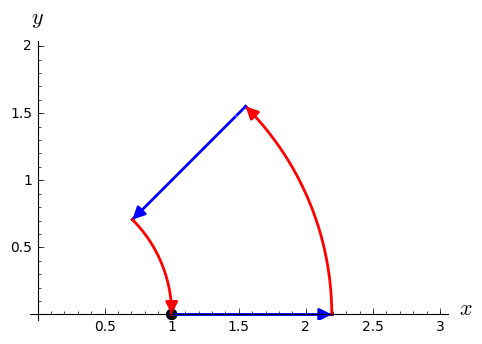

In [10]:
# Αρχικό σημείο

(x0 , y0) = (1 , 0)
pp = point( (x0,y0) , pointsize=70,color='black')

# Πρώτα στην κατεύθυνση της ροής που παράγεται από το X

p1 = parametric_plot( ( sigma_x(t,x0,y0) , sigma_y(t,x0,y0) ) , 
                     (t, 0, pi/4),color='blue', thickness=2) ; 
(x1 , y1) = ( sigma_x(pi/4,x0,y0) , sigma_y(pi/4,x0,y0)   ) ;
ar1 = arrow( (x1, y1),(x1+0.0001,y1))

# Έπειτα στην κατεύθυνση της ροής που παράγεται από το Υ από το σημείο ( X1 , Y1)

p2 = parametric_plot( ( tau_x(t,x1,y1) , tau_y(t,x1,y1) ) , 
                     (t, 0, pi/4),color='red', thickness=2) ; 
(x2 , y2) = ( ( tau_x(pi/4,x1,y1) , tau_y(pi/4,x1,y1) )  ) ;
ar2 = arrow( (x2, y2),(x2-0.0001,y2+0.0001), color='red')

# Μετά στην κατεύθυνση της ροής που παράγεται από το X από το σημείο ( Χ2 , Υ2 ), αντίστροφα ! (t -> -t)

p3 = parametric_plot( ( sigma_x(-t,x2,y2) , sigma_y(-t,x2,y2) ) , 
                     (t, 0, pi/4),color='blue', thickness=2) ; 
(x3, y3 ) = ( sigma_x(-pi/4,x2,y2) , sigma_y(-pi/4,x2,y2) ) ;
ar3 = arrow( (x3, y3),(x3-0.0001,y3-0.0001), color='blue')

# Και τέλος την κατεύθυνση της ροής που παράγεται από το Y από το σημείο ( Χ3 , Υ3 ), αντίστροφα ! (t -> -t)

p4 = parametric_plot( ( tau_x(-t,x3,y3) , tau_y(-t,x3,y3) ) , 
                     (t, 0, pi/4),color='red', thickness=2) ; 
ar4 = arrow( (x0, y0+0.0001),(x0,y0), color='red')

# Γραφική απεικόνιση όλων παραπάνω στο ίδιο γραφικό

(pp+p1+p2+p3+p4+ar1+ar2+ar3+ar4).show(figsize=5,xmin=0,xmax=3,ymin=0,ymax=2,axes_labels=['$x$','$y$'])

### *Συμπεράσματα :*

Από το παραπάνω σχήμα της καμπύλης $s(t)$ παρατηρούμε ότι ξεκινώντας από το σημείο $(1,0)$ και ταξιδεύοντας κατά μήκος των ροών $\sigma_t$, $\tau_t$, $\sigma_{-t}$, και $\tau_{-t}$ επιστρέψαμε στο αρχικό σημείο $(1,0)$. Πράγματι

In [11]:
print '(', x0 ,',', y0 ,')' , 'σημείο αφετηρίας της καμπύλης'
print '(', tau_x(-pi/4,x3,y3) ,',', tau_y(-pi/4,x3,y3) ,')' , 'σημείο τερματισμού της καμπύλης'

( 1 , 0 ) σημείο αφετηρίας της καμπύλης
( 1 , 0 ) σημείο τερματισμού της καμπύλης


Αυτό δικαιλογείται από το γεγονός ότι η αγκύλη Lie $[\,X\,,\,Y\,]$ των διανυσματικών πεδίων $X$, $Y$, 
μετρά την αστοχία να κλείσει το "παραλληλόγραμμο" <br><br>
$$  \tau(\delta,\sigma(\varepsilon,x)) \phantom{o}_{\longrightarrow}\!\!\!\uparrow \qquad  \sigma(\varepsilon,\tau(\delta,x) \uparrow^{\longrightarrow}$$

Στην προκειμένη περίπτωση των ροών $\sigma_t$ και $\tau_s$ που παράγονται από τα διανυσματικά πεδία $X$, $Y$, αντίστοιχα,  οποιοδήποτε τέτοιο παραλληλόγραμμο κλείνει αφού ${\mathcal{L}}_X Y = [\,X\,,\,Y\,]=0$.
